# Propensity - Stratification

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [3]:
features = [
    "married",
    "re74",
    "re75",
    "age",
    "black",
    "hispanic",
    "education",
    "nodegree",
]
X = lalonde_obs[features]
y = lalonde_obs["treat"]

In [4]:
log_reg = LogisticRegression()

In [5]:
log_reg.fit(X, y)

/Users/jacob/.pyenv/versions/miniconda3-3.11-24.1.2-0/envs/jobt/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
propensity_scores = log_reg.predict_proba(X)[:, 1]
lalonde_obs["propensity_score"] = propensity_scores

In [7]:
num_strata_values = range(5, 51, 3)
overall_effects = []

In [8]:
for num_strata in num_strata_values:
    lalonde_obs["strata"] = pd.qcut(
        lalonde_obs["propensity_score"], num_strata, labels=False
    )

    strata_effects = []
    strata_counts = []

    for stratum in range(num_strata):
        stratum_data = lalonde_obs[lalonde_obs["strata"] == stratum]
        treated = stratum_data[stratum_data["treat"] == 1]
        control = stratum_data[stratum_data["treat"] == 0]

        if len(treated) > 0 and len(control) > 0:
            treated_outcome = treated["re78"].mean()
            control_outcome = control["re78"].mean()
            effect = treated_outcome - control_outcome
            strata_effects.append(effect)
            strata_counts.append(len(treated))

    overall_effect = np.average(strata_effects, weights=strata_counts)
    overall_effects.append(overall_effect)

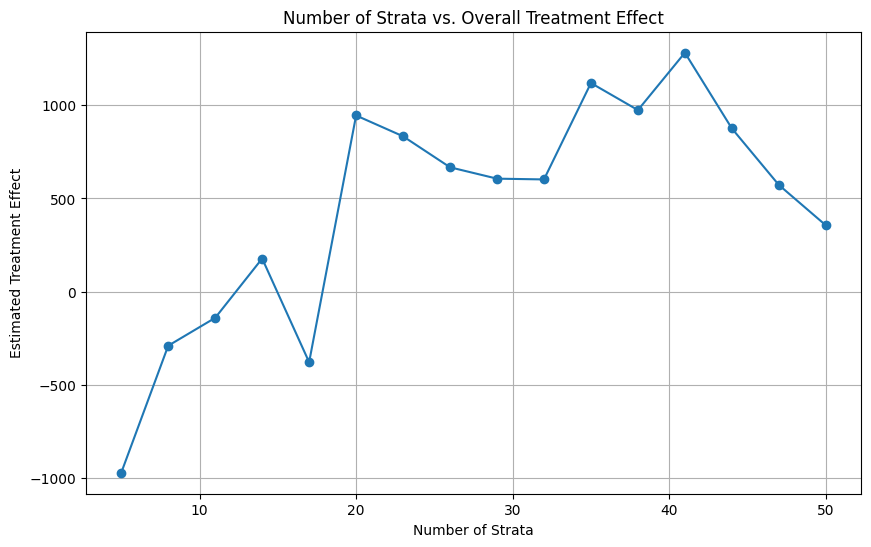

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(num_strata_values, overall_effects, marker="o")
plt.xlabel("Number of Strata")
plt.ylabel("Estimated Treatment Effect")
plt.title("Number of Strata vs. Overall Treatment Effect")
plt.grid(True)
plt.show()